### Ask to draw five cards and read omens

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv('/Users/simonsicard/Projects/chatgpt_training/.env') # read local .env file
openai.organization = os.getenv("OPENAI_ORGANISATION")
openai.api_key = os.getenv("OPENAI_API_KEY")

In [6]:
from langchain.chains import SimpleSequentialChain
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [5]:
llm = ChatOpenAI(temperature=0.9)

In [10]:
llm = ChatOpenAI(temperature=0.9)

# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "Pick {number_of_cards} cards from a tarot deck, explicit the name and purpose of the drawing that might result from picking {number_of_cards} and write the card down down"
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [11]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 100 words description for the following \
    Five-Card Tarot Spread:{cards_drawing}"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [12]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [13]:
overall_simple_chain.run(5)



> Entering new SimpleSequentialChain chain...
The Five Card Tarot Spread is a commonly used spread that provides insight into various aspects of a person's life. Here are the five cards that you have drawn:

1. The Fool - Represents new beginnings, spontaneous actions, and stepping into the unknown.
2. The Lovers - Symbolizes love, relationships, and making choices based on passion and harmony.
3. The Tower - Signifies sudden change, upheaval, and the breaking down of old structures to make way for something new.
4. The Empress - Represents abundance, fertility, nurturing energy, and creativity.
5. The Hermit - Symbolizes introspection, solitude, and seeking inner wisdom and guidance.

The purpose of this reading might be to gain insight into a specific situation or to receive guidance and advice regarding your current path. It suggests that you are in a phase of transition and are being called to embrace change, trust your instincts, and seek personal growth. The presence of The Lov

'In this reading, the presence of The Fool suggests that you are starting a new chapter in your life, filled with excitement and possibilities. The Lovers indicate that relationships and choices related to love will play a crucial role in this journey, urging you to follow your heart and create harmony in your interactions. The Tower signifies that there may be sudden changes or disruptions in your life, but these are necessary to break down old structures and make way for something new and better. The Empress assures you that this transition will bring abundance and fertility in various aspects of your life, encouraging you to nurture your ideas and embrace your creative side. The Hermit advises you to take some time for introspection and seek inner wisdom and guidance to navigate through this transformative phase successfully. Overall, this spread suggests that you are on the brink of significant personal growth and advises you to trust in the process and embrace the changes that lie

### Chain with specified output key variable names

In [19]:
from langchain.chains import SequentialChain

In [20]:
llm = ChatOpenAI(temperature=0.9)

# prompt template 1: translate to english
first_prompt = ChatPromptTemplate.from_template(
    "Pick {number_of_cards} cards from a tarot deck, explicit the name and purpose of the drawing that might result from picking {number_of_cards} and write the card down down"
)
# chain 1: input= Review and output= English_Review
chain_one = LLMChain(llm=llm, prompt=first_prompt, 
                     output_key="selected_cards"
                    )

In [34]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 100 words description for the following \
    {number_of_cards} Card Tarot Spread:{selected_cards}. You will directly speak to the person discussing with you exactly like if you were an oracle."
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt, output_key="cards_reading")

In [35]:
overall_chain = SequentialChain(chains=[chain_one, chain_two],
                                             input_variables=["number_of_cards"],
    output_variables=["selected_cards","cards_reading"],
                                             verbose=True
                                            )

In [36]:
overall_chain(3)



> Entering new SequentialChain chain...

> Finished chain.


{'number_of_cards': 3,
 'selected_cards': 'Card 1: The Fool\nPurpose: The Fool represents new beginnings, spontaneity, and taking a leap of faith. It signifies a fresh start or a blank slate in life. This card encourages you to embrace the unknown, have an open mind, and trust in the journey ahead. It reminds you to remain optimistic, adventurous, and to follow your instincts as you embark on a new path.\n\nCard 2: The Emperor\nPurpose: The Emperor symbolizes authority, structure, and control. It represents a need for stability, taking charge, and establishing a strong foundation. This card signifies leadership qualities and the ability to make clear and informed decisions. It suggests that you should assert yourself, set boundaries, and maintain discipline to achieve your goals and bring order to your current situation.\n\nCard 3: The High Priestess\nPurpose: The High Priestess embodies intuition, mystery, and inner wisdom. This card signifies a deep connection with your subconscious 

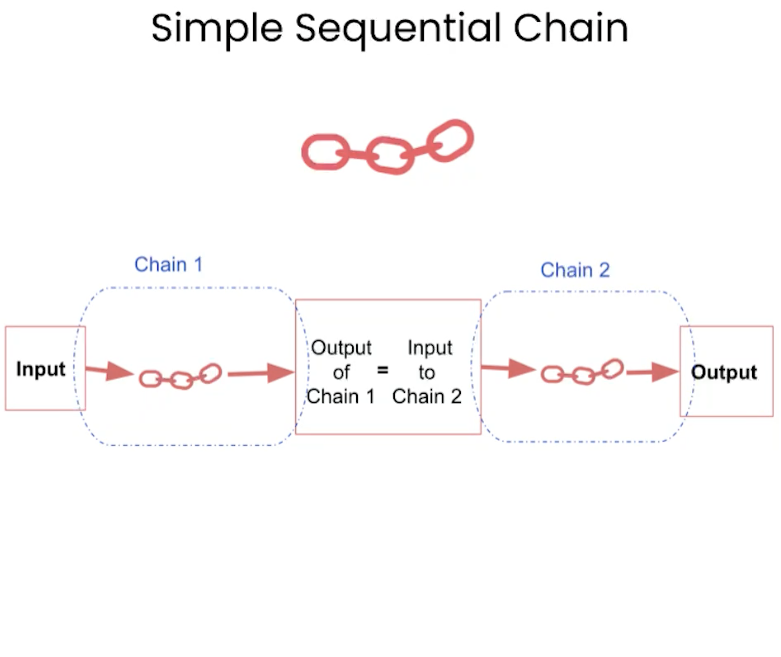

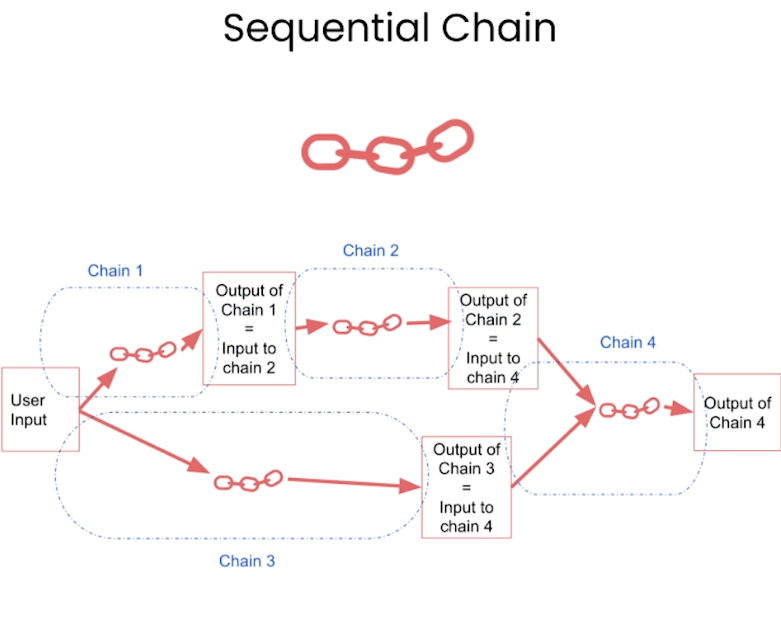

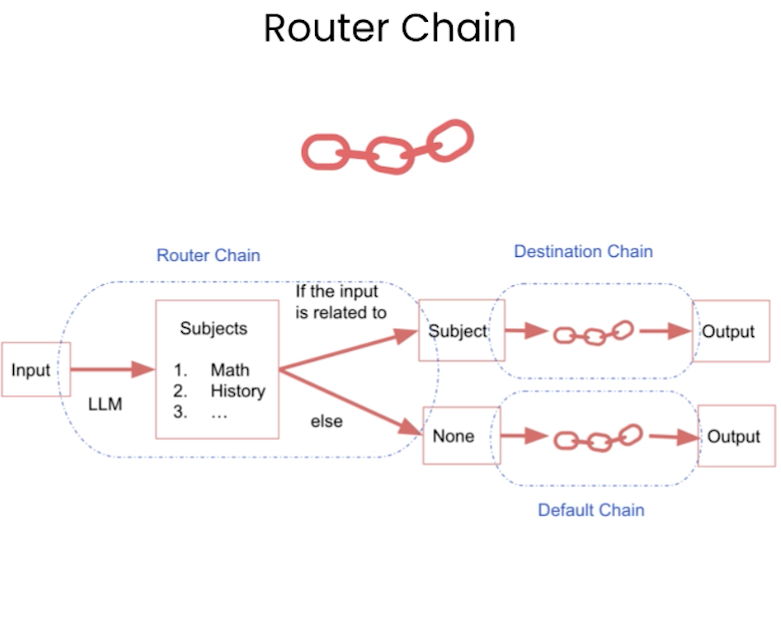